In [2]:
%matplotlib inline
import numpy as np
import astropy.io.fits as fits
import matplotlib.pyplot as plt
# Set up some default matplotlib options
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['image.origin'] = 'lower'
plt.rcParams['image.cmap'] = 'viridis'

In [3]:
sp = fits.open("/home/solararies/Project/Data/data_1/raster_data1/iris_l2_20220306_215937_3600105475_raster_t000_r00000.fits")

In [4]:
sp.info()

Filename: /home/solararies/Project/Data/data_1/raster_data1/iris_l2_20220306_215937_3600105475_raster_t000_r00000.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     347   ()      
  1                1 ImageHDU        33   (334, 548, 256)   int16 (rescales to float32)   
  2                1 ImageHDU        33   (412, 548, 256)   int16 (rescales to float32)   
  3                1 ImageHDU        33   (193, 548, 256)   int16 (rescales to float32)   
  4                1 ImageHDU        33   (336, 548, 256)   int16 (rescales to float32)   
  5                1 ImageHDU        33   (59, 548, 256)   int16 (rescales to float32)   
  6                1 ImageHDU        33   (75, 548, 256)   int16 (rescales to float32)   
  7                1 ImageHDU        33   (379, 548, 256)   int16 (rescales to float32)   
  8                1 ImageHDU        54   (47, 256)   float64   
  9                1 TableHDU        53   256R x 7C   [A10, A10, A3,

In [5]:
hd = sp[0].header
hd['OBS_DESC']

'Very large dense 256-step raster 84.2x175 256s  Si IV   Mg II h/k De'

In [65]:
hd

SIMPLE  =                    T / Written by IDL:  Thu Feb 23 05:00:10 2023      
BITPIX  =                   16 / Number of bits per data pixel                  
NAXIS   =                    0 / Number of data axes                            
EXTEND  =                    T / FITS data may contain extensions               
DATE    = '2023-02-23'         / Creation UTC (CCCC-MM-DD) date of FITS header  
COMMENT FITS (Flexible Image Transport System) format is defined in 'Astronomy  
COMMENT and Astrophysics', volume 376, page 359; bibcode 2001A&A...376..359H    
TELESCOP= 'IRIS    '           /                                                
INSTRUME= 'SPEC    '           /                                                
DATA_LEV=              2.00000 /                                                
LVL_NUM =              2.00000 /                                                
VER_RF2 = 'L12-2019-08-08'     /                                                
DATE_RF2= '2023-02-23T12:42:

In [6]:

print(len(sp))
print(hd['NWIN'])

10
7


In [7]:
print('Window. Name      : wave start - wave end\n')
for i in range(hd['NWIN']):
    win = str(i + 1)
    print('{0}. {1:15}: {2:.2f} - {3:.2f} Å'
          ''.format(win, hd['TDESC' + win], hd['TWMIN' + win], hd['TWMAX' + win]))


Window. Name      : wave start - wave end

1. C II 1336      : 1331.85 - 1340.49 Å
2. O I 1356       : 1346.82 - 1357.49 Å
3. Si IV 1394     : 1391.28 - 1396.16 Å
4. Si IV 1403     : 1398.20 - 1406.72 Å
5. 2832           : 2831.34 - 2834.29 Å
6. 2814           : 2812.65 - 2816.42 Å
7. Mg II k 2796   : 2790.65 - 2809.90 Å


In [10]:
sp[7].data.shape


(256, 548, 379)

The first axis is the number of raster positions (or time if sit and stare), the second axis the y coordinate (space along slit), and the last axis is the wavelength. We can make use of astropy.wcs to use the WCS header information to convert from pixels to coordinates. For example, for obtaining the wavelength scale we do:

In [11]:
from astropy.wcs import WCS
wcs = WCS(sp[7].header)
m_to_nm = 1e9  # convert wavelength to nm
nwave = sp[7].data.shape[2]
wavelength = wcs.all_pix2world(np.arange(nwave), [0.], [0.], 0)[0] * m_to_nm

Text(0, 0.5, 'Intensity (DN)')

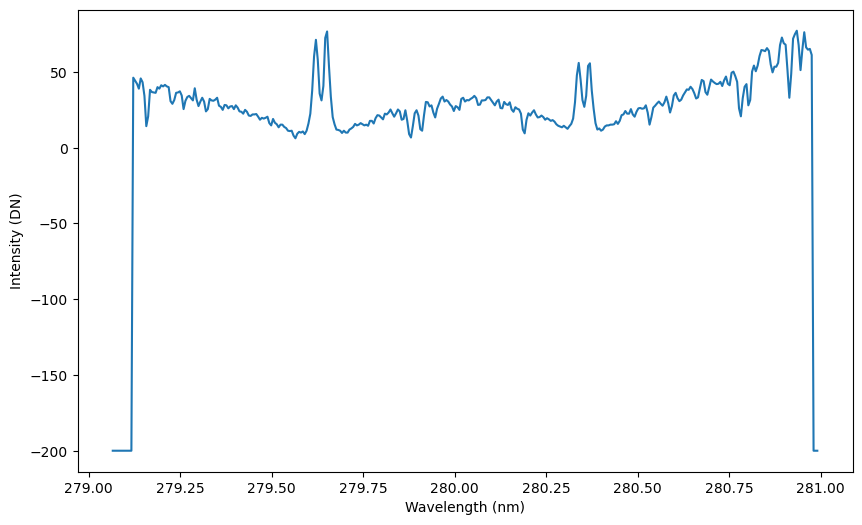

In [13]:
plt.plot(wavelength, sp[7].data[100,100, :])
#plt.plot(wavelength, sp[2].data[1, 600])
#plt.plot(wavelength, sp[4].data[2, 600])
#plt.plot(wavelength, sp[4].data[3, 600])

plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity (DN)")

In [15]:
print(sp[7].data[0, :, :].shape)


(548, 379)


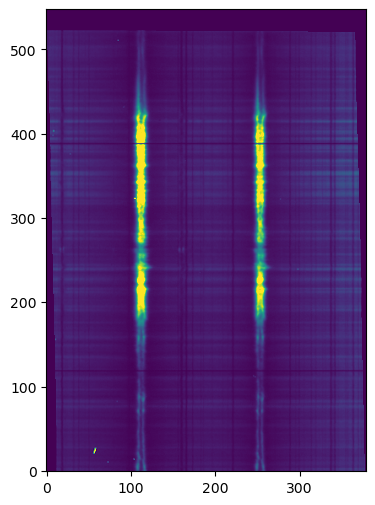

In [23]:
plt.imshow( sp[7].data[0,:, :], vmin=0, vmax=500)

In [64]:
mg_index = np.argmin(np.abs(wavelength - 279.6351))
mg_index

112

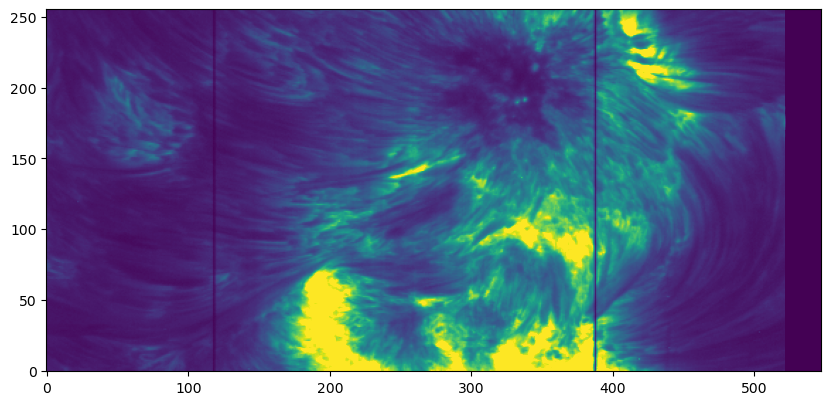

In [47]:
plt.imshow(sp[7].data[..., mg_index], vmin=0, vmax=500)


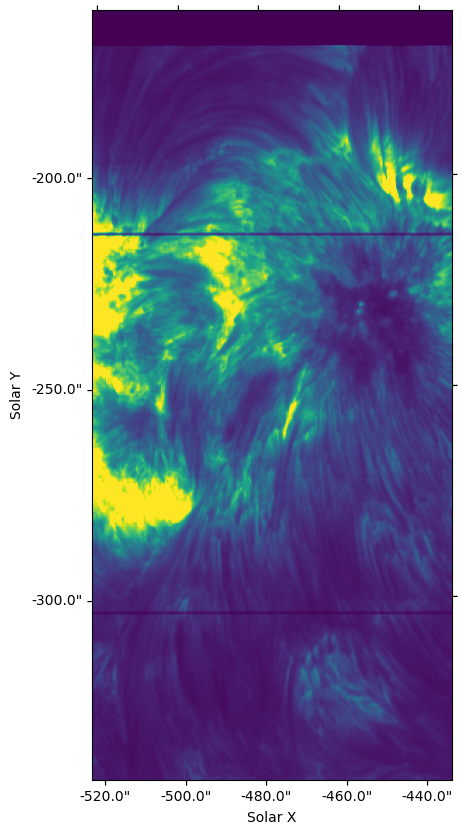

In [35]:

figure = plt.figure(figsize=(6, 10))
ax = plt.subplot(projection=wcs.dropaxis(0), slices=('y', 'x'))
ax.imshow(sp[7].data[..., mg_index].T, vmin=0, vmax=500)
ax.coords[0].set_major_formatter('s.s')
ax.coords[1].set_major_formatter('s.s')
ax.set_xlabel("Solar X")
ax.set_ylabel("Solar Y")

In [56]:
arr = np.array([1, 2, 30,7,32,34,56,1,2,6, 4, 5])

In [57]:
m = np.argmin(np.abs(arr - 36.5))


In [60]:
x=np.abs(arr - 36.5)

In [63]:

m

5